<a href="https://colab.research.google.com/github/cisirtraining/summerschool/blob/master/Day1_Introduction_to_DL_framework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image classification**

**Load data & pre-process**

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils

# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Data pre-processing
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("Data shape: ", X_train.shape)
print("Label shape: ", Y_train.shape)

Data shape:  (60000, 28, 28, 1)
Label shape:  (60000, 10)


**Show some random sample**

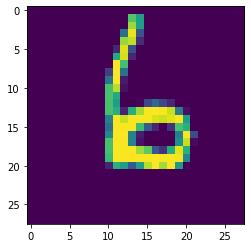

In [8]:
import numpy as np
from matplotlib import pyplot as plt

rnd_int = np.random.randint(X_train.shape[0], size=1)[0]
plt.imshow(X_train.reshape(X_train.shape[0], 28, 28)[rnd_int])

**Define CNN model**

Model build.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400) 

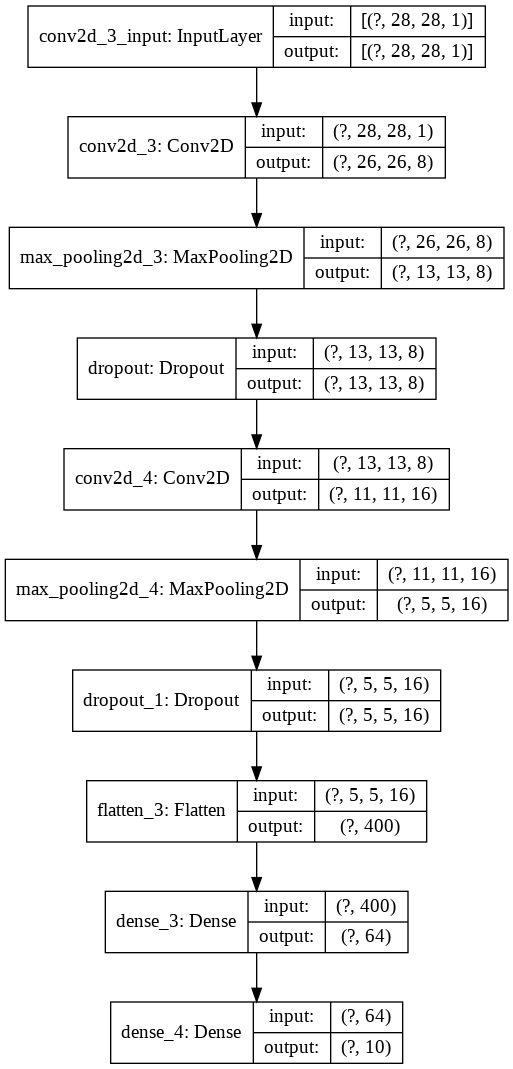

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils.vis_utils import plot_model

def build_model():
  num_filters = 8
  filter_size = 3
  pool_size = 2
  input_shape = (28, 28, 1)
  no_classes = 10

  model = Sequential([
                      Convolution2D(num_filters, filter_size, 
                                    activation='relu', input_shape=input_shape),
                      MaxPooling2D(pool_size=pool_size),
                      # Dropout(0.25),
                      # Convolution2D(num_filters*2, filter_size, activation='relu'),
                      # MaxPooling2D(pool_size=pool_size),
                      # Dropout(0.25),
                      Flatten(),
                      # Dense(num_filters*8, activation='relu'),
                      Dense(no_classes, activation='softmax'),
                      ])
  print("Model build.")
  return model

  
# Define our CNN model
myCNN = build_model()

# Show myCNN
print(myCNN.summary())
plot_model(myCNN, to_file='myCNN_plot.png', show_shapes=True, show_layer_names=True)

**Compile myCNN**

In [10]:
myCNN.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

**Fit myCNN**

In [11]:
history = myCNN.fit(
    X_train,
    Y_train,
    epochs=3,
    validation_data=(X_test, Y_test),
    batch_size=10, verbose=2
    )

# Saving myCNN weight
myCNN.save_weights('myCNN_mnist.h5')
print("myCNN weight is saved.")

Epoch 1/3
6000/6000 - 13s - loss: 0.2909 - accuracy: 0.9175 - val_loss: 0.1778 - val_accuracy: 0.9515
Epoch 2/3
6000/6000 - 12s - loss: 0.1356 - accuracy: 0.9610 - val_loss: 0.1164 - val_accuracy: 0.9652
Epoch 3/3
6000/6000 - 12s - loss: 0.0995 - accuracy: 0.9712 - val_loss: 0.0896 - val_accuracy: 0.9727
myCNN weight is saved.


**Prediction with trained myCNN**

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Build the myCNN.
myCNN = build_model()

# Load the myCNN's saved weights.
myCNN.load_weights('myCNN_mnist.h5')

Model build.


predictions:  [8]


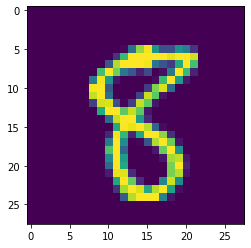

In [29]:
import numpy as np
from matplotlib import pyplot as plt

rnd_int = np.random.randint(X_train.shape[0], size=1)[0]
sample = X_train[rnd_int]

# Generate predictions for samples
predictions = myCNN.predict_classes(np.expand_dims(sample, axis=0))
print("predictions: ", predictions)
plt.imshow(np.squeeze(sample, 2))